In [27]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from pylab import rcParams

# The weight sensor 

In [28]:
weight = pd.read_csv('Weight__GraphViewer.csv',  parse_dates=['Timestamp'], index_col=['Timestamp']) #convert the time column to datetime and use as index
#this will be unnecessery with our data
weight = weight["control-20 - Weight (g)"]
weight = weight[weight.index<"2018-07-23T00:00:00"] 

In [29]:
weight.head()

Timestamp
2018-06-17 14:57:00    6190.53
2018-06-17 15:00:00    6190.16
2018-06-17 15:03:00    6189.70
2018-06-17 15:06:00    6188.93
2018-06-17 15:09:00    6188.94
Name: control-20 - Weight (g), dtype: float64

In [30]:
print(f'The length of the weight df is {len(weight)} rows.')

The length of the df is 16947 rows.


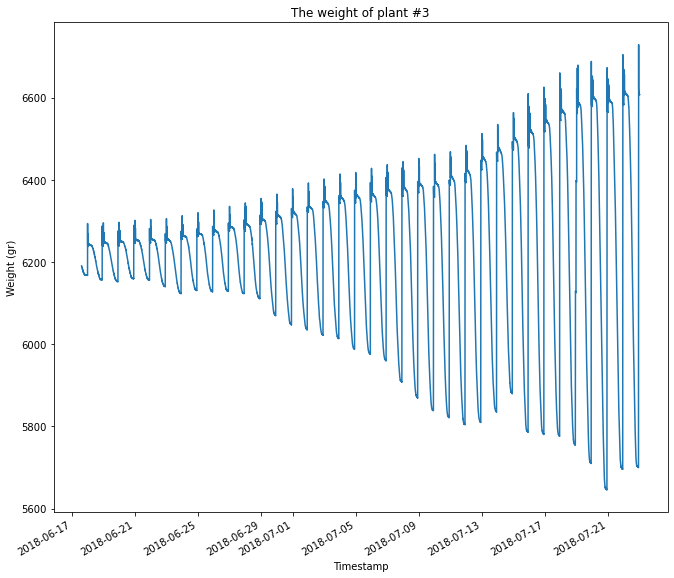

In [31]:
# visualisation of the data
ax= weight.plot(figsize=(11, 10))
ax.set_title('The weight of plant #3', fontsize=12)
ax.set_ylabel('Weight (gr)')
plt.show()

In [32]:
# smoth the nuises of the weight 
weight = weight.rolling(10, center=True).sum()
weight.dropna(inplace= True)

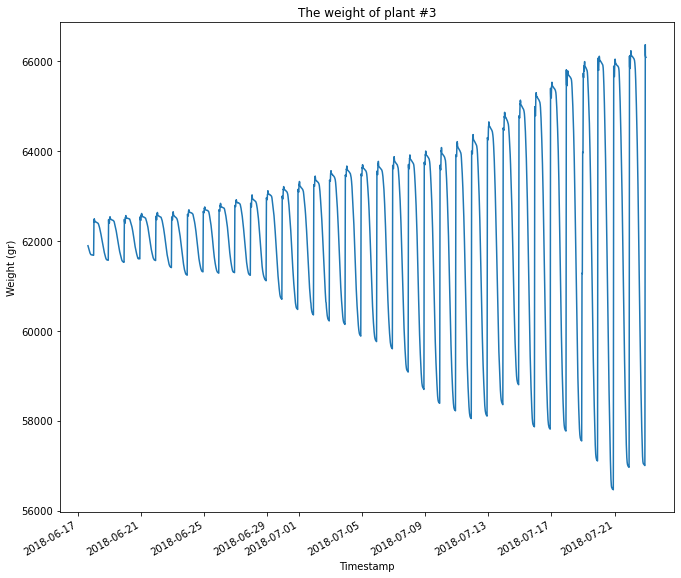

In [33]:
# visualisation of the data
ax= weight.plot(figsize=(11, 10))
ax.set_title('The weight of plant #3', fontsize=12)
ax.set_ylabel('Weight (gr)')
plt.show()

In [34]:
df = weight.diff()
df[5:20]

Timestamp
2018-06-17 15:27:00   -2.58
2018-06-17 15:30:00   -3.24
2018-06-17 15:33:00   -2.84
2018-06-17 15:36:00   -2.94
2018-06-17 15:39:00   -2.77
2018-06-17 15:42:00   -3.44
2018-06-17 15:45:00   -3.25
2018-06-17 15:48:00   -2.81
2018-06-17 15:51:00   -2.32
2018-06-17 15:54:00   -3.58
2018-06-17 15:57:00   -2.69
2018-06-17 16:00:00   -2.45
2018-06-17 16:03:00   -2.44
2018-06-17 16:06:00   -2.10
2018-06-17 16:09:00   -3.18
Name: control-20 - Weight (g), dtype: float64

In [35]:
# get time of irrigation
def get_irrigation(df):
    """ when df gains weight yield 1, otherwise yield 0 """
    
    irri = np.where(df.diff()>0, 1, 0) #when df gains weight yield 1, otherwise yield 0
    print( f'Plant #3 was irrigated {irri.sum()} times at this experiment time.')       
    return irri

In [37]:
a= get_irrigation(weight)

Plant #3 was irrigated 1678 times at this experiment time.


### Time series decomposition
When visualizing time series data, you should look out for some distinguishable patterns:

* seasonality: does the data display a clear periodic pattern? 
* trend: does the data follow a consistent upwards or downward slope? 
* noise: are there any outlier points or missing values that are not consistent with the rest of the data?

#### Additive Model
An additive model suggests that the components are added together as follows:
y(t) = Level + Trend + Seasonality + Noise
--> A linear trend is a straight line.

#### Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:
y(t) = Level * Trend * Seasonality * Noise
-->
A nonlinear trend is a curved line.

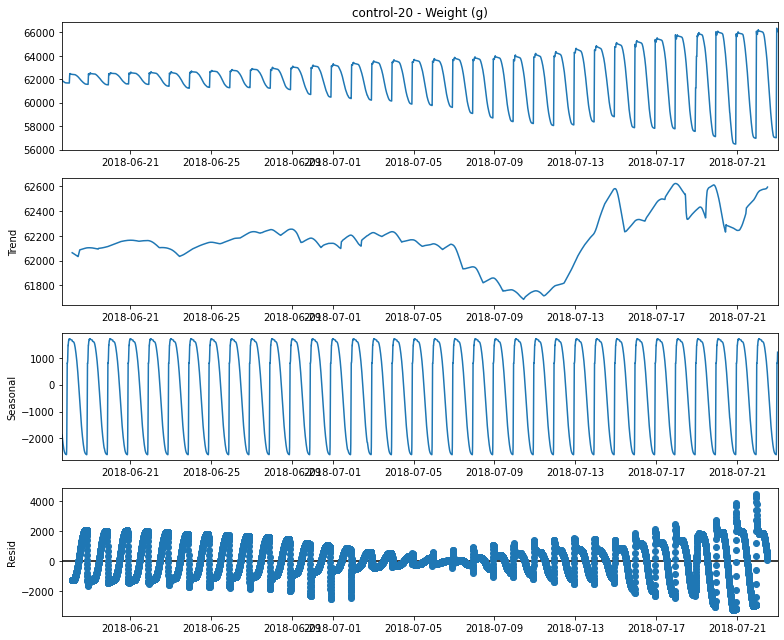

In [40]:
%matplotlib inline
decom_weight = sm.tsa.seasonal_decompose(weight , model='additive' ,period= 480) #perion: every 15min * 24h = 96
rcParams['figure.figsize'] = 11, 9
fig = decom_weight.plot()
plt.show()

# The soil moisture sensor

In [ ]:
soil_moisture = pd.read_csv('Weight__GraphViewer.csv',  parse_dates=['Timestamp'], index_col=['Timestamp']) #convert the time column to datetime and use as index

### Time series decomposition
When visualizing time series data, you should look out for some distinguishable patterns:

* seasonality: does the data display a clear periodic pattern? 
* trend: does the data follow a consistent upwards or downward slope? 
* noise: are there any outlier points or missing values that are not consistent with the rest of the data?

#### Additive Model
An additive model suggests that the components are added together as follows:
y(t) = Level + Trend + Seasonality + Noise
--> A linear trend is a straight line.

#### Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:
y(t) = Level * Trend * Seasonality * Noise
-->
A nonlinear trend is a curved line.

In [ ]:
%matplotlib inline
decom_soil_moisture = sm.tsa.seasonal_decompose(soil_moisture , model='additive' ,period= 96) #perion: every 15min * 24h = 96
rcParams['figure.figsize'] = 11, 9
fig = decom_soil_moisture.plot()
plt.show()